## Restaurant Sales Dataset
***
Here, 
The "Sales_Data" dataset contains transactional sales records with details like Order ID, Date, Product, Price, Quantity, Purchase Type, Payment Method, Manager, and City. It includes both online and in-store purchases across multiple locations.

This data is available in Excel file format. We are going to analyze and visualize this data.

###

### Importing the Required Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
df= pd.read_excel('Sales_Data.xlsx')

In [5]:
#print the first 5 rows from your dataframe by default
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [6]:
#print the last 5 rows from your dataframe by default
df.tail()


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
249,10709,2022-12-28,Sides & Other,4.99,200.400802,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754.426482,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.407035,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630.372493,Drive-thru,Gift Card,Walter Muller,Berlin
253,10713,2022-12-29,Beverages,2.95,677.966102,Drive-thru,Gift Card,Walter Muller,Berlin


## shape of the dataframe

In [7]:
df.shape

(254, 9)

## Information about the dataframe


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.0+ KB


## Checking for Missing values

In [9]:
df.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

`Observation:`
- no missing values

## Checking for duplicate rows in the dataset

In [10]:
df.duplicated().sum()

np.int64(0)

`Observation:`
- no duplicate records in the dataset

## To get 5 point summary of numerical_data

In [11]:
df.describe()

,Order ID,Date,Price,Quantity
count,254.000000,254,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.102323,460.610541
min,10452.000000,2022-11-07 00:00:00,2.950000,200.400802
25%,10520.250000,2022-11-21 00:00:00,3.490000,201.005025
50%,10583.500000,2022-12-03 00:00:00,4.990000,538.876059
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.444188
max,10713.000000,2022-12-29 00:00:00,29.050000,754.426482
std,75.889181,NaN,4.341855,214.889551


## To get the summary of Categorical_data

In [12]:
df.describe(include= 'all')

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
count,254.000000,254,254,254.000000,254.000000,254,254,254,254
unique,NaN,NaN,5,NaN,NaN,3,3,14,5
top,NaN,NaN,Chicken Sandwiches,NaN,NaN,Online,Credit Card,Tom Jackson,London
freq,NaN,NaN,52,NaN,NaN,107,120,74,75
mean,10584.133858,2022-12-03 10:23:37.322834688,NaN,7.102323,460.610541,NaN,NaN,NaN,NaN
min,10452.000000,2022-11-07 00:00:00,NaN,2.950000,200.400802,NaN,NaN,NaN,NaN
25%,10520.250000,2022-11-21 00:00:00,NaN,3.490000,201.005025,NaN,NaN,NaN,NaN
50%,10583.500000,2022-12-03 00:00:00,NaN,4.990000,538.876059,NaN,NaN,NaN,NaN
75%,10649.750000,2022-12-16 18:00:00,NaN,9.950000,677.444188,NaN,NaN,NaN,NaN
max,10713.000000,2022-12-29 00:00:00,NaN,29.050000,754.426482,NaN,NaN,NaN,NaN


# to show all the column names

In [13]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

## EDA

-----

In [14]:
# Checking the unique values in the 'Manager' column
df['Manager'].unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [15]:
# to show count of unique values present in the column
df['Manager'].nunique()

14

In [16]:
# Cleaning the 'Manager' column by removing leading/trailing spaces and replacing multiple spaces with a single space
df['Manager'] = df['Manager'].str.strip().str.replace(r'\s+', ' ', regex= True)

In [17]:
# to show all the unique values of the column
df['Manager'].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

#### Q.1) Most Preferred Payment Method ?

In [18]:
# to show the unique values of a column
df['Payment Method'].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [19]:
# to show the count of unique values in a column
df['Payment Method'].nunique()

3

In [20]:
# to show the unique values of a column with their counts
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

In [21]:
# to get the result in percentage
df['Payment Method'].value_counts(normalize= True)*100

Payment Method
Credit Card    47.244094
Cash           29.921260
Gift Card      22.834646
Name: proportion, dtype: float64

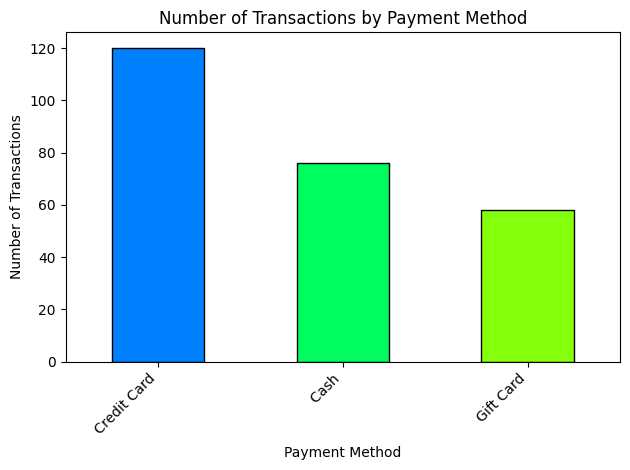

In [28]:
# to draw the bar graph
df['Payment Method'].value_counts().plot(kind= 'bar', color=sns.color_palette('gist_ncar', as_cmap=False),edgecolor='black')


# Adding labels and title
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### The analysis reveals that credit cards are the most commonly used payment method for settling bills.

#### Q.2) Most Selling Product ?
- By Quantity
- By Revenue


By Quantity

In [33]:
# to make the group of unique values of a column
most_quantity= df.groupby('Product')['Quantity'].sum().astype(int).sort_values(ascending=False)

In [34]:
type(most_quantity)

pandas.core.series.Series

In [36]:
# To convert the index of a Series into a column to form a DataFrame
most_quantity = most_quantity.reset_index()
most_quantity

,index,Product,Quantity
0,0,Beverages,34983
1,1,Fries,32034
2,2,Burgers,29022
3,3,Chicken Sandwiches,11135
4,4,Sides & Other,9819


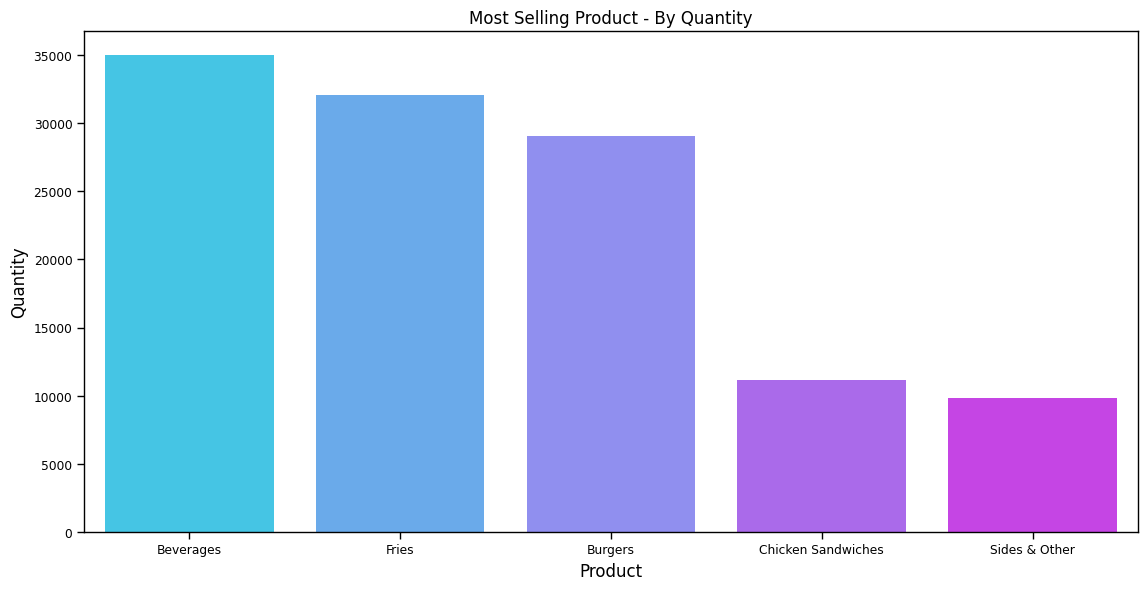

In [44]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})
                

# creating a bar plot
sns.barplot(x= 'Product', y= 'Quantity', data= most_quantity, palette= 'cool')
plt.title("Most Selling Product - By Quantity")              
plt.xlabel("Product")
plt.ylabel("Quantity")

plt.show()

### The analysis indicates that Beverages is the highest-selling product in terms of quantity.

#### By Revenue

In [45]:
## Calculating the total revenue for each transaction by multiplying quantity sold with the price per unit
df['Revenue']= df['Quantity'] * df['Price']

In [50]:
df['Revenue'].unique()

array([ 2000.        ,  2200.        ,  1000.        ,  7400.        ,
        2000.        ,  7200.        ,  2000.        ,  6800.        ,
        6600.        , 16074.49856734,  5839.1959799 ,  7000.        ,
        2400.        ,  6200.        ,  6400.        ,  6000.        ,
        5800.        ,  7600.        ,  7800.        ,  8200.        ,
        8400.        ,  8800.        ,  2600.        ,  9000.        ,
        2800.        ,  9400.        ,  3000.        ,  9800.        ])

In [54]:
# Grouping  in the specified column
most_revenue= df.groupby('Product')['Revenue'].sum().astype(int).sort_values(ascending=False)

In [55]:
# Converting the Series index into a column to create a DataFrame
most_revenue= most_revenue.reset_index()
most_revenue

,Product,Revenue
0,Burgers,377000
1,Fries,125674
2,Chicken Sandwiches,114639
3,Beverages,103200
4,Sides & Other,48999


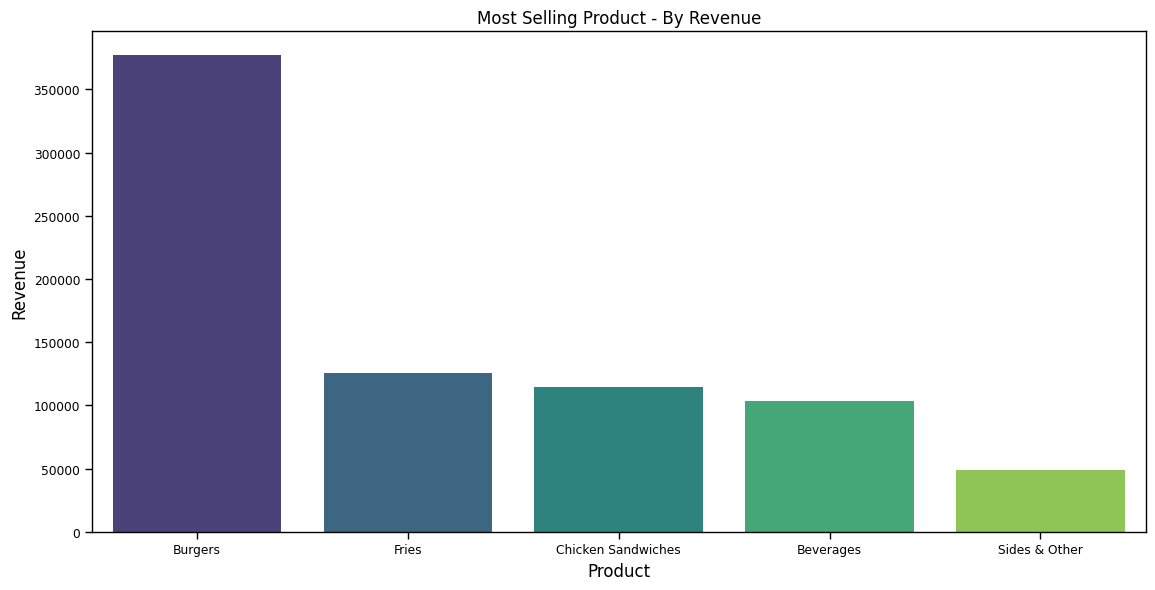

In [ ]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# Generating a bar plot for data visualization
sns.barplot(x= 'Product', y= 'Revenue', data= most_revenue, palette='viridis')
plt.title("Most Selling Product - By Revenue")             
plt.xlabel("Product")                              
plt.ylabel("Revenue")
plt.show()

### The analysis reveals that **Burgers** generate the highest revenue among all product categories.

#### Q.3) Which city had maximum revenue
##### AND
##### Which Manager earned maximum revenue

In [62]:
# using groupby on 'City' & 'Revenue' column
city_per_revenue= df.groupby('City')['Revenue'].sum().astype(int).sort_values(ascending=False)

In [65]:
# Converting the Series index into a column to create a DataFrame
city_per_revenue= city_per_revenue.reset_index()
city_per_revenue

,index,City,Revenue
0,0,Lisbon,241713
1,1,London,211200
2,2,Madrid,136200
3,3,Berlin,100600
4,4,Paris,79800


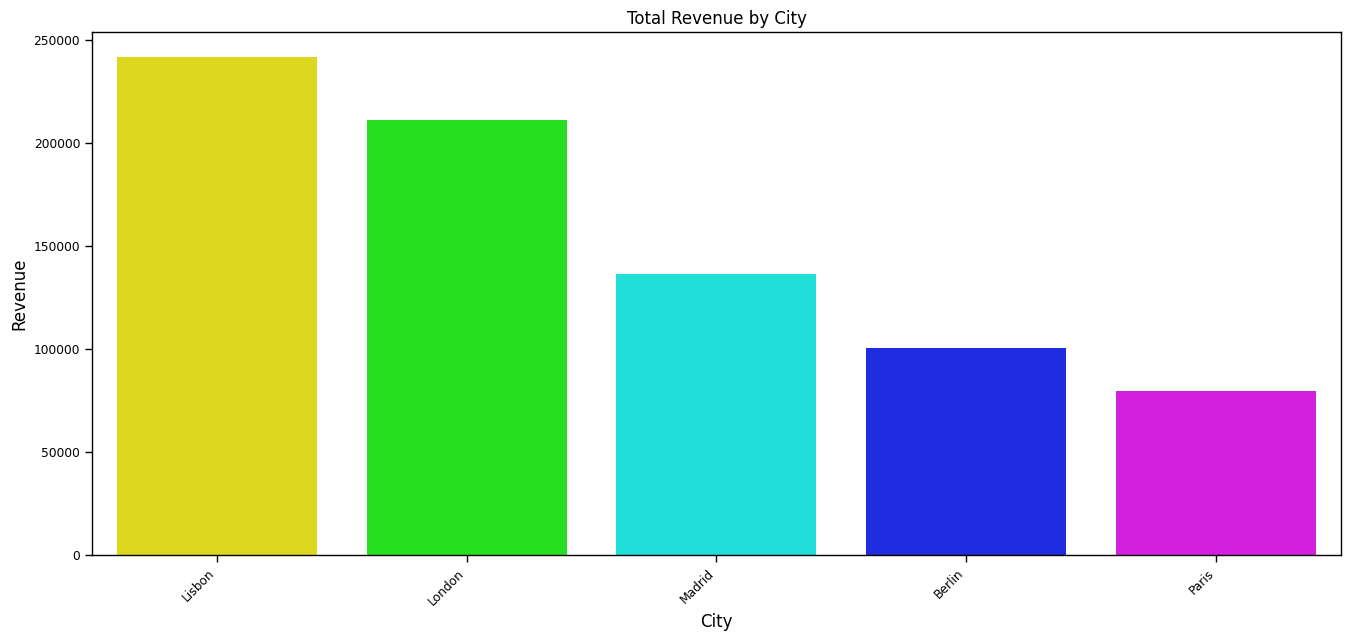

In [67]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# Generating a bar plot for data visualization
sns.barplot(x= 'City', y= 'Revenue', data= city_per_revenue, palette='hsv')
plt.title("Total Revenue by City")              
plt.xlabel("City")                               
plt.ylabel("Revenue")  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### The analysis shows that Lisbon generates the highest revenue among all cities.

In [70]:
# using groupby on 'Manager' & 'Revenue' column
managers_revenue= df.groupby('Manager')['Revenue'].sum().astype(int).sort_values(ascending=False)

In [71]:
# Converting the Series index into a column to create a DataFrame
managers_revenue= managers_revenue.reset_index()
managers_revenue

,Manager,Revenue
0,Joao Silva,241713
1,Tom Jackson,211200
2,Pablo Perez,136200
3,Walter Muller,100600
4,Remy Monet,79800


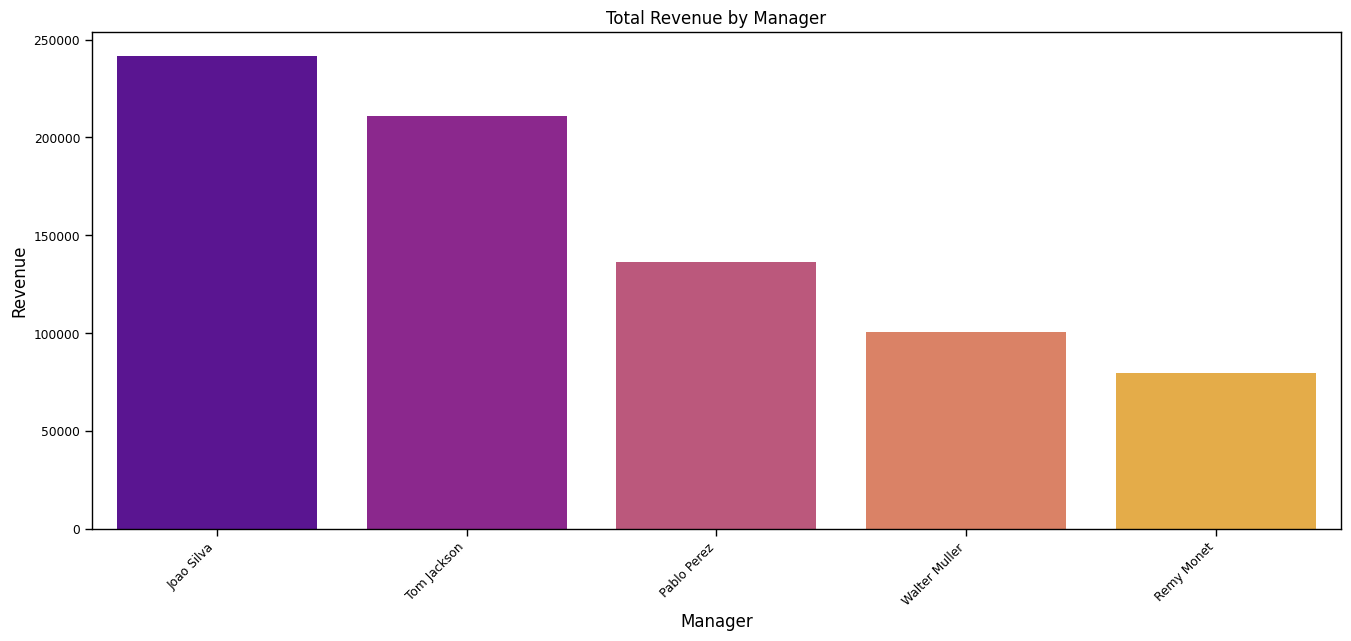

In [73]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# Generating a bar plot for data visualization
sns.barplot(x= 'Manager', y= 'Revenue', data= managers_revenue, palette='plasma')
plt.title("Total Revenue by Manager")              
plt.xlabel("Manager")                               
plt.ylabel("Revenue")  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### The analysis indicates that Joao Silva achieves the highest revenue among all managers

#### Q.4) Date wise revenue

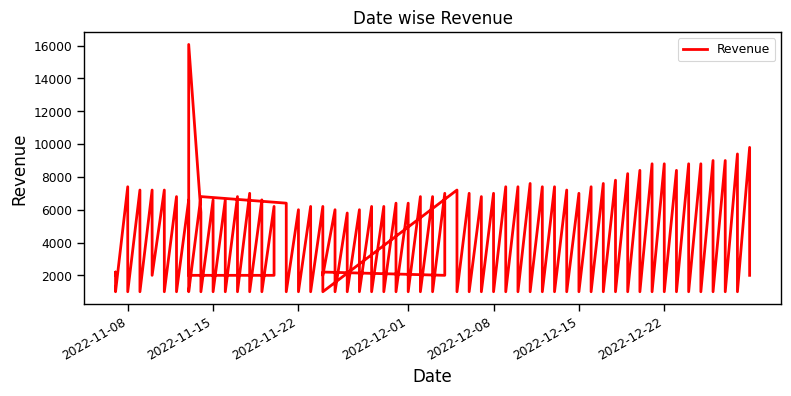

In [76]:
#Setting the plot title to indicate "Date-wise Revenue"
df.plot('Date', 'Revenue', color='red',linewidth=2, figsize=(9,4))
plt.title("Date wise Revenue")                        
plt.xlabel("Date")                                    
plt.ylabel("Revenue")                                 
plt.show()

### The date-wise revenue plot shows significant fluctuations over time, with a notable spike around mid-November, followed by gradual and consistent growth in December.

#### Q.5) Average Revenue

In [79]:
df['Revenue'].mean()

np.float64(3029.5814745954126)

#### Q.6) Average Revenue of November & December month

In [80]:
# creating a new column showing Month only
df['Month']= df['Date'].dt.month
df['Month']

0      11
1      11
2      11
3      11
4      11
       ..
249    12
250    12
251    12
252    12
253    12
Name: Month, Length: 254, dtype: int32

In [82]:
# filtering the records with month '11'
month_11= df[df['Month']==11]
month_11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London,2000.0,11
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid,2200.0,11
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon,1000.0,11
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin,7400.0,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin,2000.0,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677.966102,Online,Credit Card,Tom Jackson,London,2000.0,11
109,10569,2022-11-30,Sides & Other,4.99,200.400802,Online,Credit Card,Tom Jackson,London,1000.0,11
127,10537,2022-11-24,Fries,3.49,630.372493,Drive-thru,Credit Card,Pablo Perez,Madrid,2200.0,11
128,10538,2022-11-24,Beverages,2.95,745.762712,Drive-thru,Credit Card,Pablo Perez,Madrid,2200.0,11


In [ ]:
# Calculating the total revenue for the month of November (month_11) by summing all revenue values
month_11['Revenue'].sum()

np.float64(332113.69454723474)

In [ ]:
# filtering the records with month '12'
month_12= df[df['Month']==12]
month_12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,492.686682,Online,Credit Card,Tom Jackson,London,6400.0,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201.005025,Online,Credit Card,Tom Jackson,London,2000.0,12
112,10572,2022-12-01,Fries,3.49,573.065903,Online,Credit Card,Remy Monet,Paris,2000.0,12
113,10573,2022-12-01,Beverages,2.95,677.966102,Online,Credit Card,Remy Monet,Paris,2000.0,12
114,10574,2022-12-01,Sides & Other,4.99,200.400802,Online,Credit Card,Remy Monet,Paris,1000.0,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.400802,Drive-thru,Gift Card,Walter Muller,Berlin,1000.0,12
250,10710,2022-12-29,Burgers,12.99,754.426482,Drive-thru,Gift Card,Walter Muller,Berlin,9800.0,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.407035,Drive-thru,Gift Card,Walter Muller,Berlin,2800.0,12
252,10712,2022-12-29,Fries,3.49,630.372493,Drive-thru,Gift Card,Walter Muller,Berlin,2200.0,12


In [ ]:
# Calculating the total revenue for the month of December (month_12) by summing all revenue values
month_12['Revenue'].sum()

np.float64(437400.0)

#### Q.10 Average 'Quantity Sold' & 'Average Revenue' for each product ?

In [88]:
product_stats= df.groupby('Product')[['Quantity','Revenue']].agg({'Quantity':'mean', 'Revenue':'mean'})
product_stats

,Quantity,Revenue
Product,,
Beverages,699.661017,2064.000000
Burgers,558.121632,7250.000000
Chicken Sandwiches,214.147661,2204.599923
Fries,628.125176,2464.205854
Sides & Other,200.400802,1000.000000


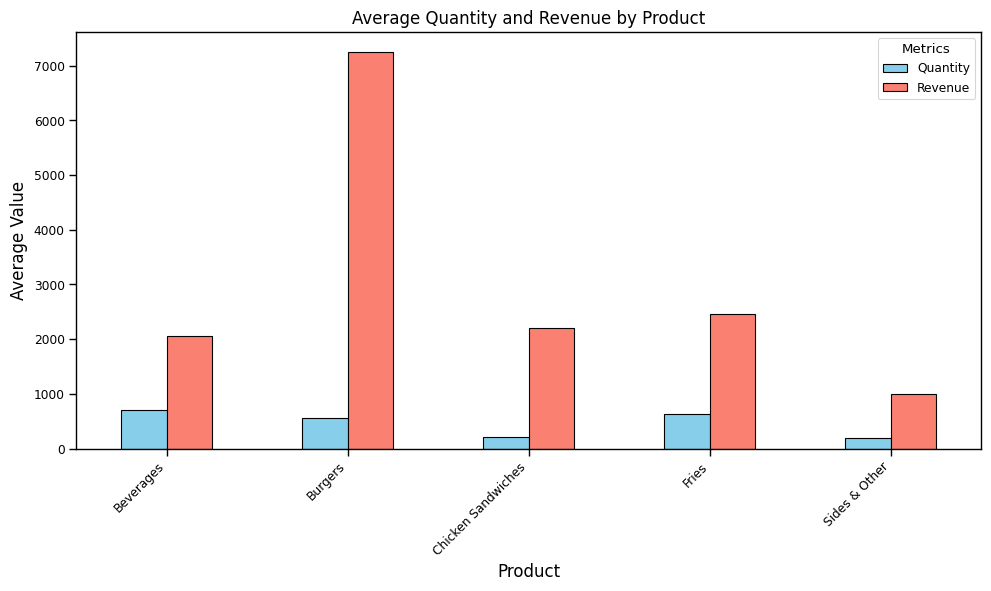

In [89]:
# Creating the plot
product_stats.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')


# Adding labels and title
plt.title('Average Quantity and Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

### Burgers generate the highest average revenue, while Beverages and Fries lead in average quantity sold.